## Problem Statement 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

##### The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

* Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

-----------------------------------------------------------------------------------------------------------------------

# Step 1. Reading and Understanding the Data
Lets Import important libraries

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 800)

## Data Understanding

In [2]:
# Reading the dataset
df_price = pd.read_csv("train.csv")

In [3]:
# First 5 records of the dataset
df_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check the shape of the dataset.
df_price.shape

(1460, 81)

In [5]:
# Info of the dataset.
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Check the summary statistics of the dataframe.
df_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

In [7]:
# Number of missing values in columns (descending order)
df_price.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

In [8]:
# check for duplicates
df_price.duplicated().sum()

0

In [9]:
# Checking if there are columns with one unique value since it won't affect our analysis
df_price.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [10]:
# Imputing missing values, based on details available from Data dictionary

df_price["PoolQC"] = df_price["PoolQC"].fillna("No Pool")
df_price["MiscFeature"] = df_price["MiscFeature"].fillna("None")
df_price["Alley"] = df_price["Alley"].fillna("No Alley Access")
df_price["Fence"] = df_price["Fence"].fillna("No Fence")
df_price["FireplaceQu"] = df_price["FireplaceQu"].fillna("No Fireplace")
df_price["MasVnrType"] = df_price["MasVnrType"].fillna("None")
df_price["GarageCond"] = df_price["GarageCond"].fillna("None")
df_price["GarageType"] = df_price["GarageType"].fillna("None")
df_price["GarageFinish"] = df_price["GarageFinish"].fillna("None")
df_price["GarageQual"] = df_price["GarageQual"].fillna("No Garage")
df_price["BsmtExposure"] = df_price["BsmtExposure"].fillna("No Basement")
df_price["BsmtFinType1"] = df_price["BsmtFinType1"].fillna("None")
df_price["BsmtFinType2"] = df_price["BsmtFinType2"].fillna("None")
df_price["BsmtCond"] = df_price["BsmtCond"].fillna("None")
df_price["BsmtQual"] = df_price["BsmtQual"].fillna("None")

#Imputing the missing values by median/mode (according to data type) for remaining features
df_price["LotFrontage"] = df_price["LotFrontage"].fillna(df_price["LotFrontage"].median())
df_price["GarageYrBlt"] = df_price["GarageYrBlt"].fillna(df_price["GarageYrBlt"].median())
df_price["MasVnrArea"] = df_price["MasVnrArea"].fillna(df_price["MasVnrArea"].median())
df_price["Electrical"] = df_price["Electrical"].fillna(df_price["Electrical"].mode()[0])

In [11]:
# Check for missing values again
df_price.isnull().sum().sort_values(ascending=False)

Id               0
CentralAir       0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSSubClass       0
Heating          0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities   

You won't see any data now as all the columns are imputed and 
there is no column with null values

## Drop Duplicates

In [12]:
# Let's drop duplicate columns if any present in data set 
df_price = df_price.drop_duplicates()
df_price.shape

(1460, 81)

In [13]:
# checkin columns 
df_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAr

In [14]:
# Id column not helpful for the analysis, dropping the column
df_price = df_price.drop("Id", axis = 1)

In [15]:
# Categorical columns
cat_cols = df_price.select_dtypes(include = "object")

# Numerical columns
num_cols = df_price.select_dtypes(exclude = "object")

In [16]:
# Display Categorical columns
cat_cols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], dtype='object')

In [17]:
# Display Numerical columns
num_cols.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

## Exploratory Data Analysis

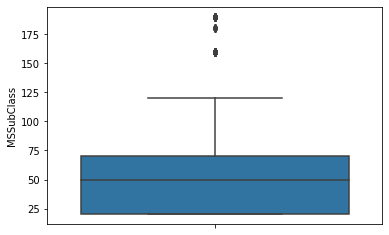

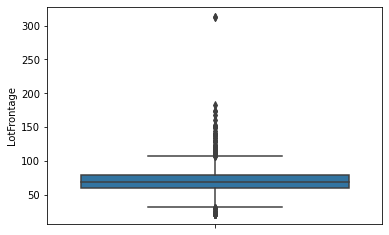

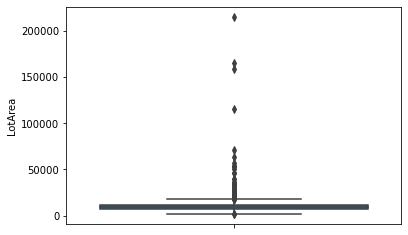

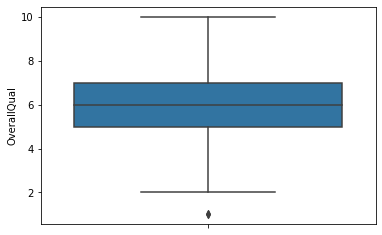

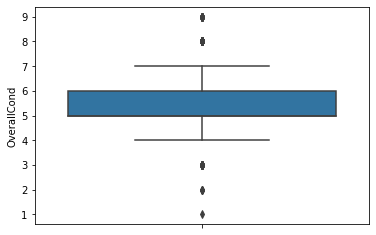

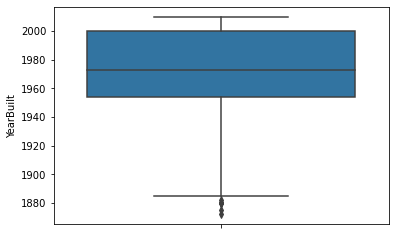

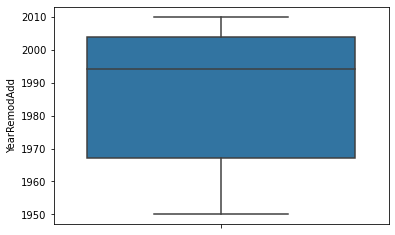

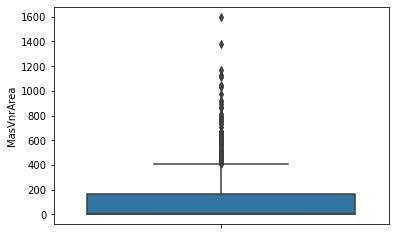

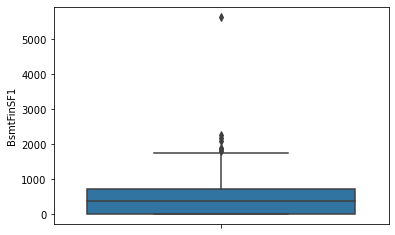

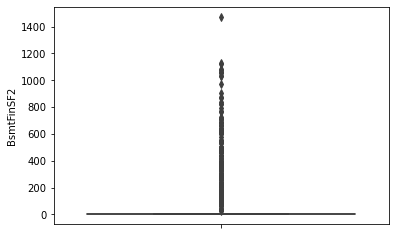

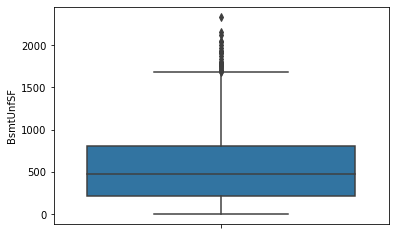

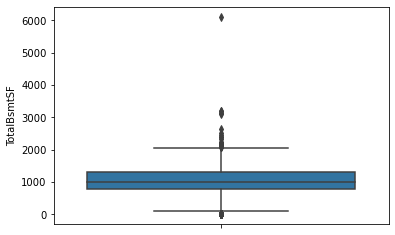

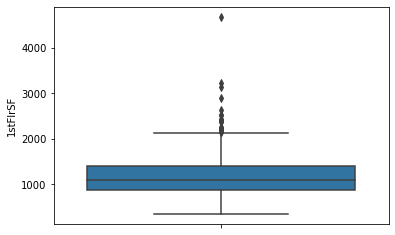

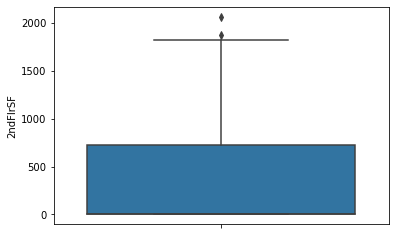

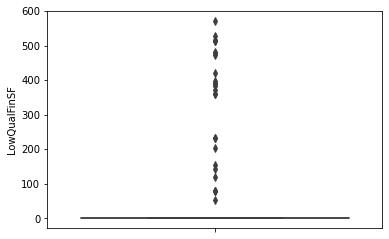

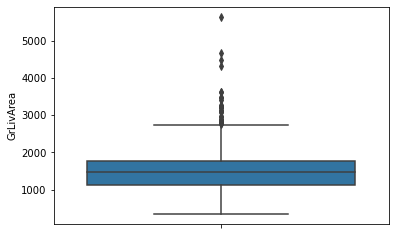

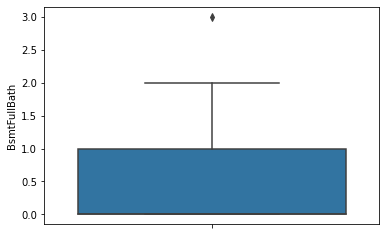

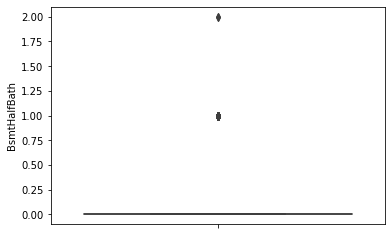

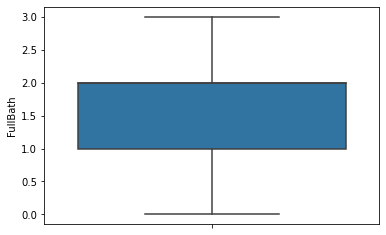

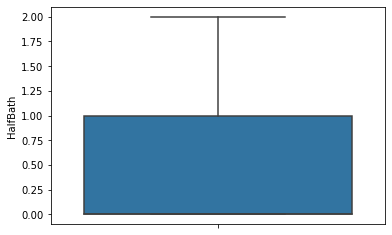

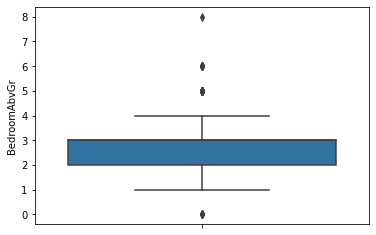

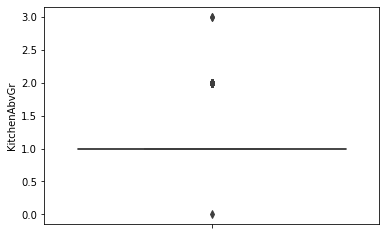

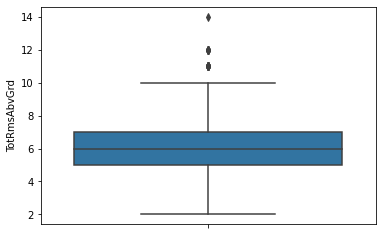

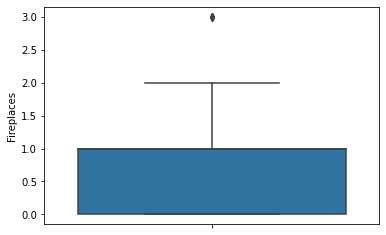

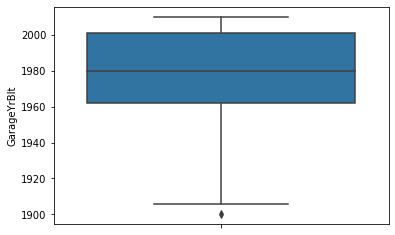

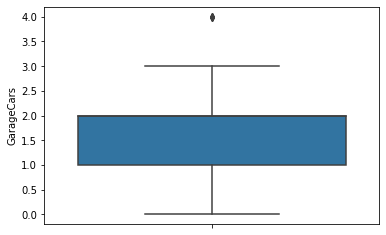

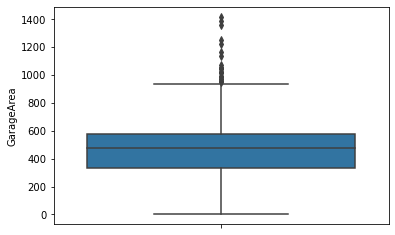

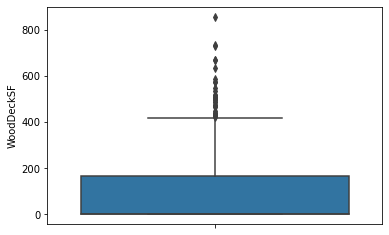

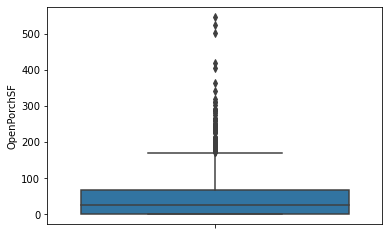

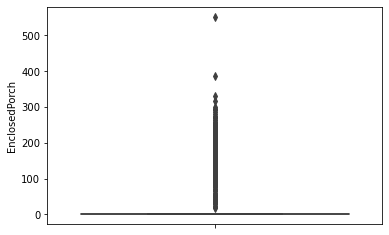

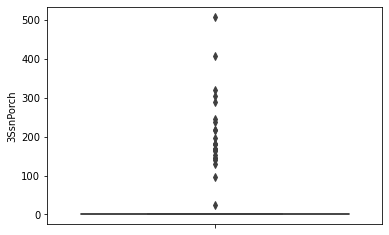

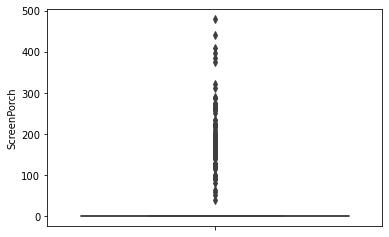

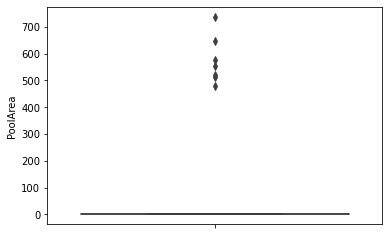

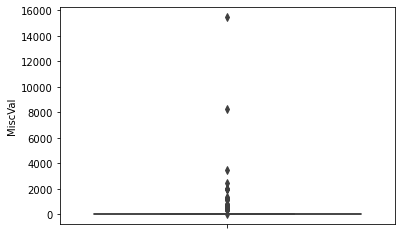

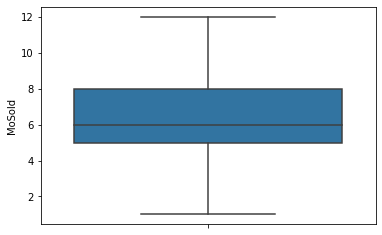

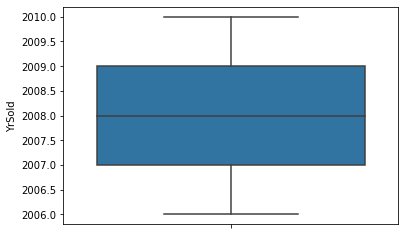

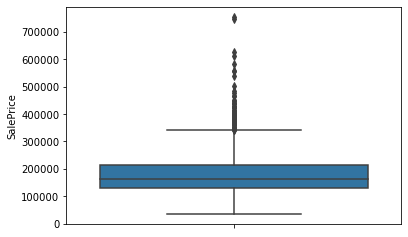

In [18]:
# Plotting boxplots to observe outliers.

for col in num_cols:
    plt.subplots()
    sns.boxplot(y = df_price[col])

So form the following Boxpplots we can observe outliers.

In [19]:
df_price.describe(percentiles = [0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.99, 1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
80%,80.000000,80.000000,12205.800000,7.000000,7.000000,2003.000000,2005.000000,205.200000,806.400000,0.000000,896.000000,1391.200000,1482.400000,796.200000,0.000000,1869.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2003.000000,2.000000,620.200000,192.000000,83.200000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,230000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000

Now, as per data distribution and box plot there are outlier's in data but we can't treat outlier's in all columns as we have a small data set and plus outlier's in some columns make sense. So we will do outlier treatment for few columns only

Below we have done outlier treatment for LotFrontage, LotArea, PoolArea, MiscVal

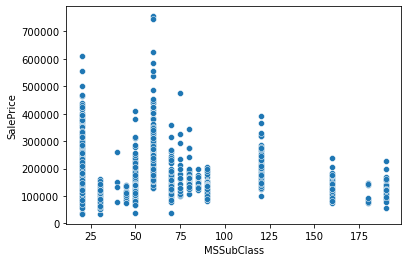

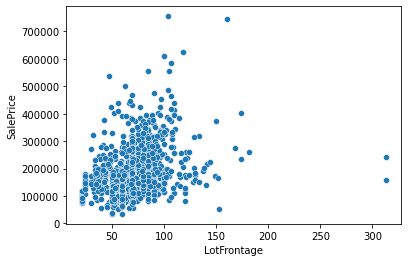

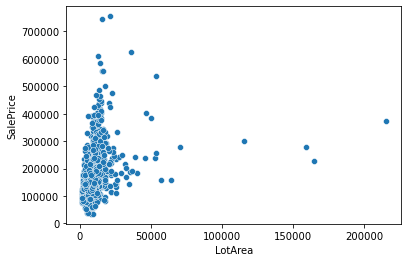

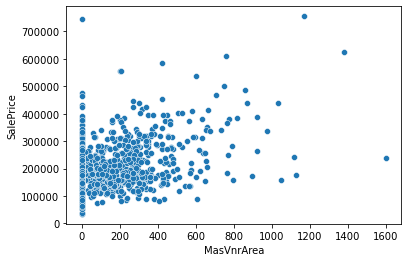

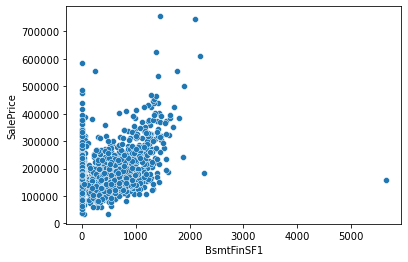

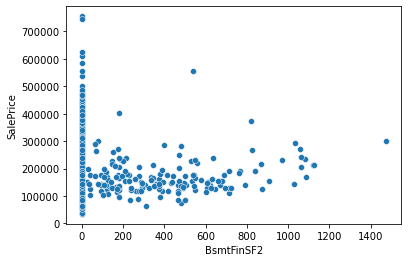

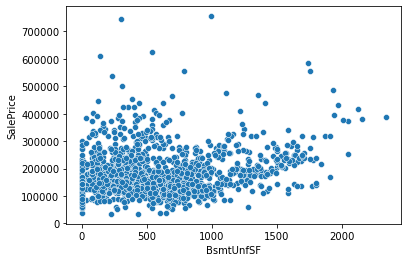

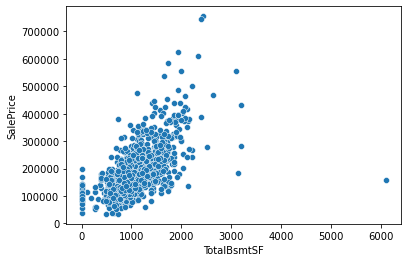

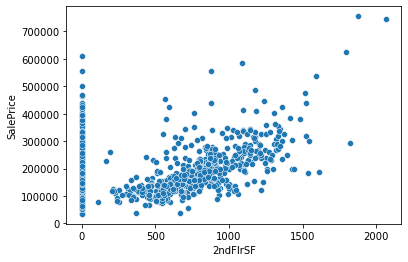

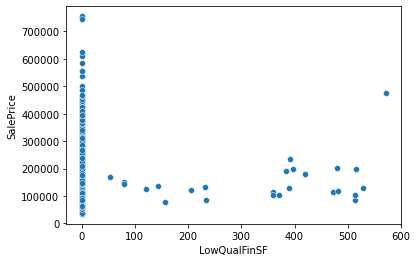

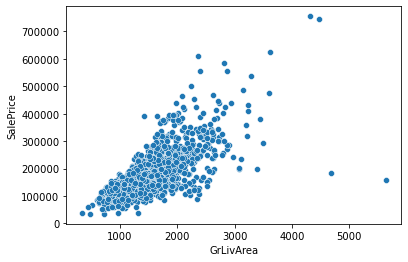

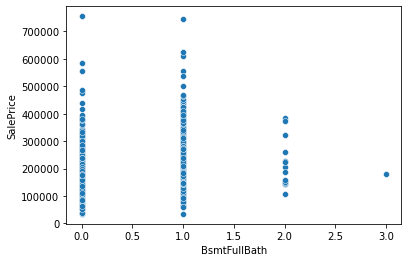

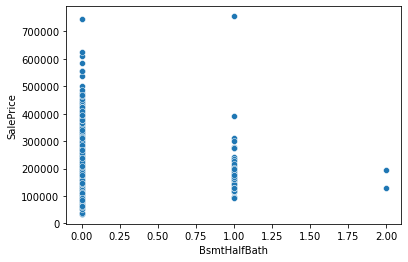

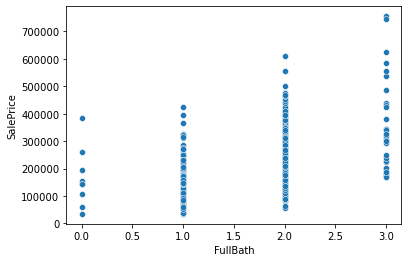

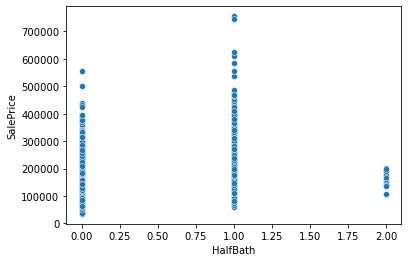

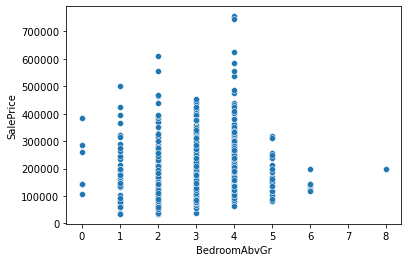

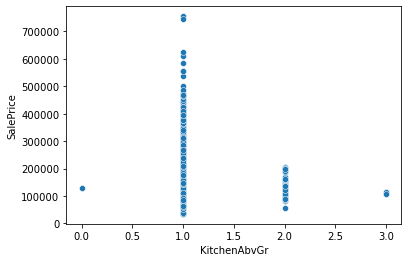

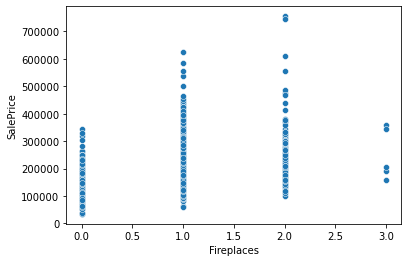

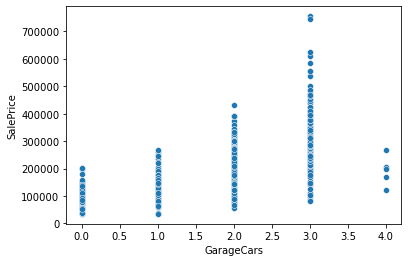

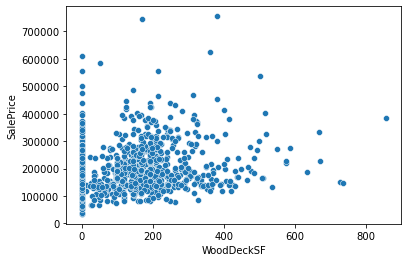

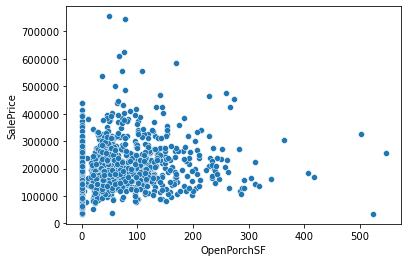

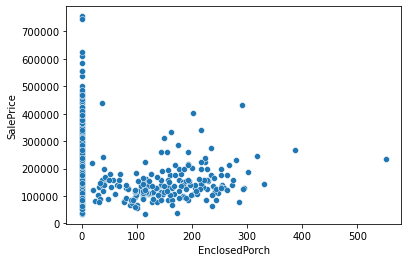

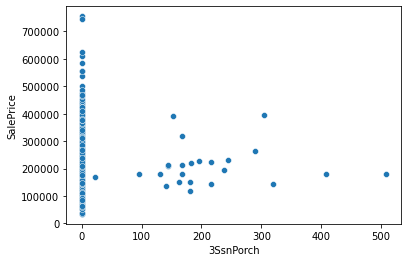

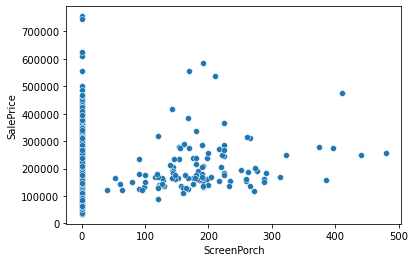

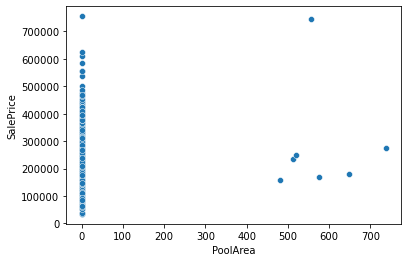

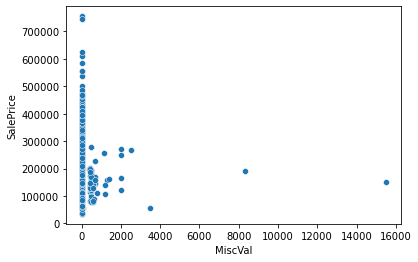

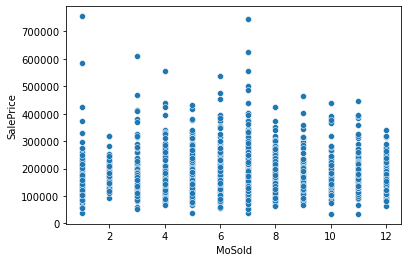

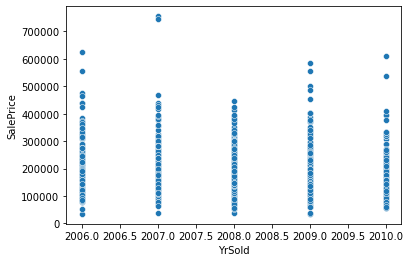

In [20]:
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
        'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
for col in cols:
    plt.subplots()
    sns.scatterplot(x = col, y = "SalePrice", data = df_price)

Conclusions:-
Followig factors affect the Sale price of the house.
- Living area size
- number of rooms in house
- gargage area
- parking for more cars
- more full bathrooms
- newer houses (new and remodelled)
- size of basement have positive impact on Sale Price.

In [21]:
cat_cols.columns

for col in cat_cols:
    print(df_price[col].value_counts(normalize = True) * 100)
    print("------------------------------------------------------------")

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
------------------------------------------------------------
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
------------------------------------------------------------
No Alley Access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64
------------------------------------------------------------
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
------------------------------------------------------------
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
------------------------------------------------------------
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
------------------------------------------------------------
Inside     72.054795
Corner     18.013699
Cul

In [22]:
# Dropping few columns based on unique values count
cols = ["Street", "Utilities", "Condition2", "RoofMatl", "Heating"]
df_price = df_price.drop(cols, axis=1)

cat_cols.drop(cols, axis=1, inplace=True)

In [23]:
df_price.shape

(1460, 75)

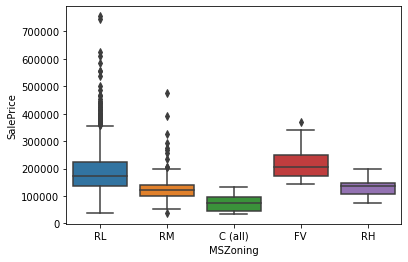

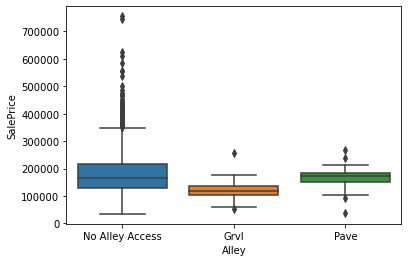

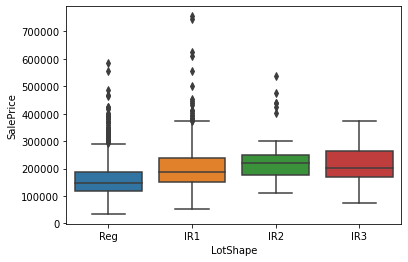

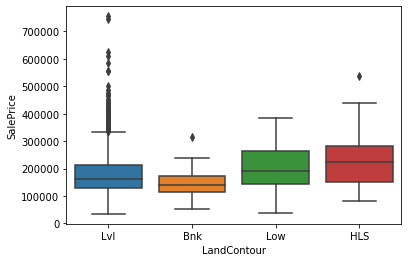

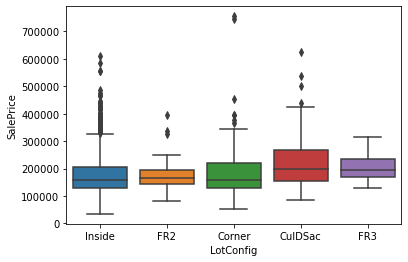

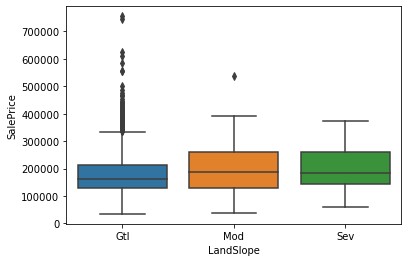

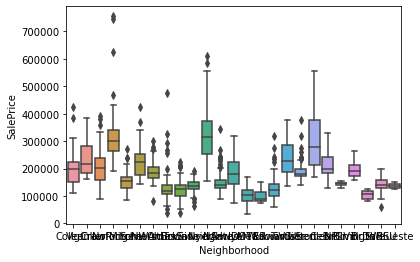

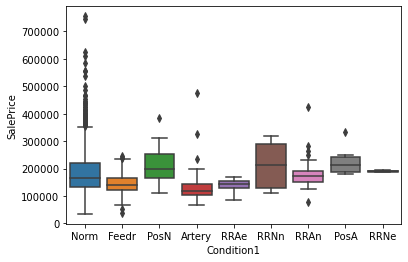

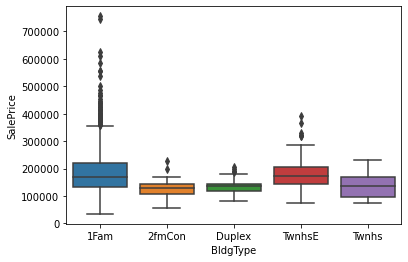

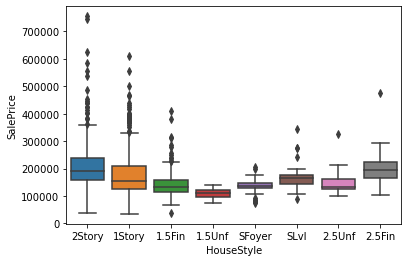

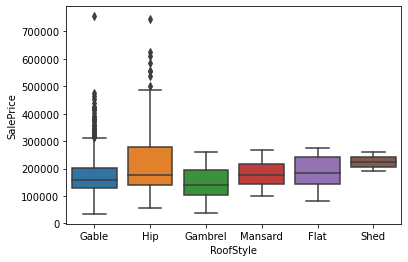

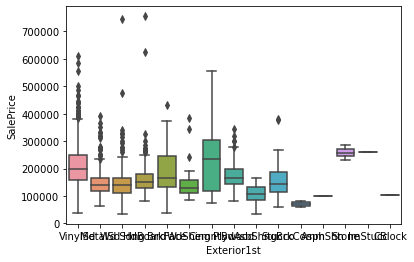

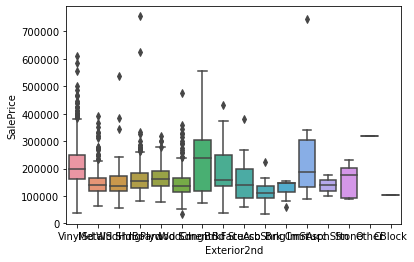

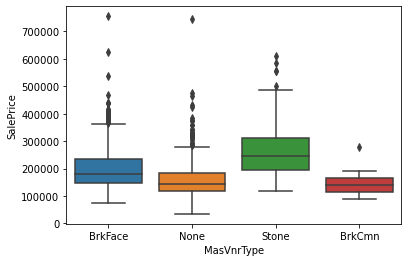

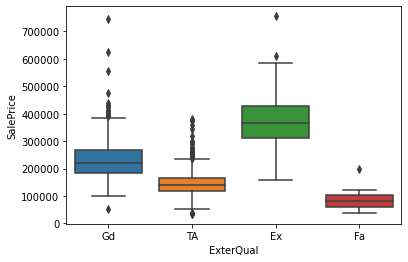

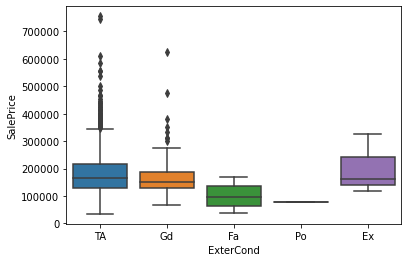

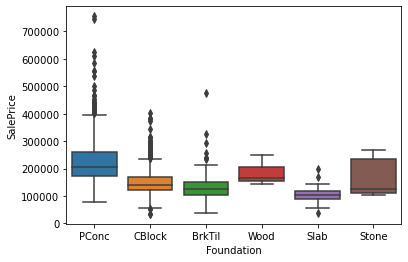

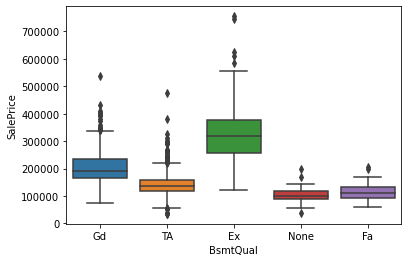

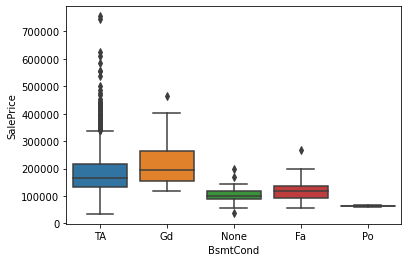

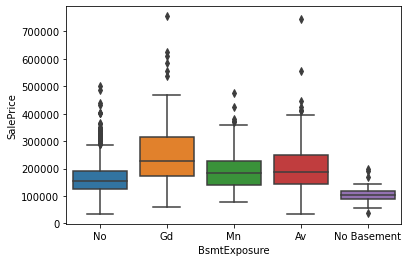

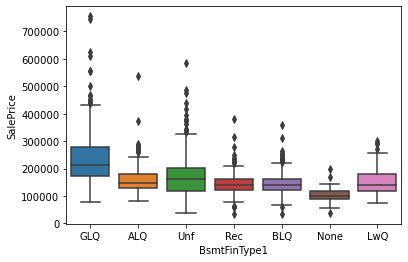

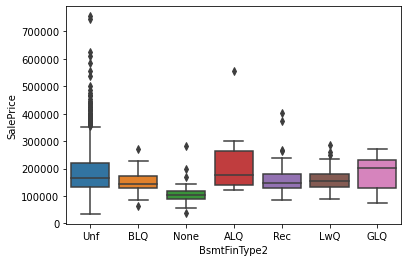

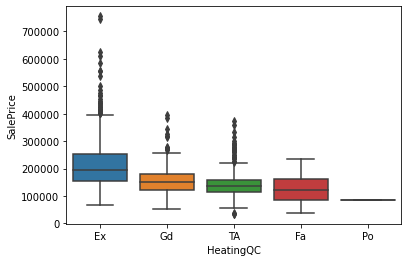

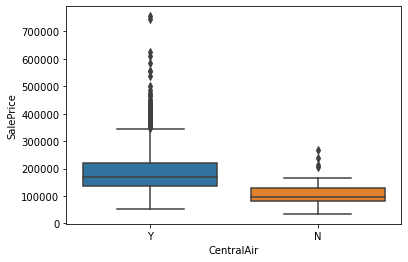

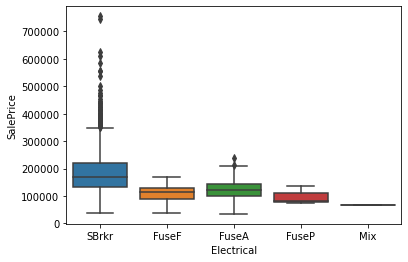

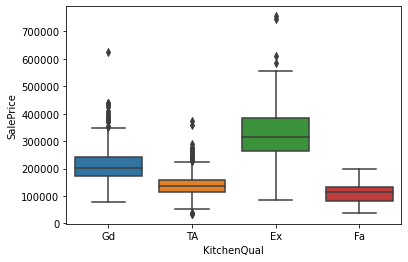

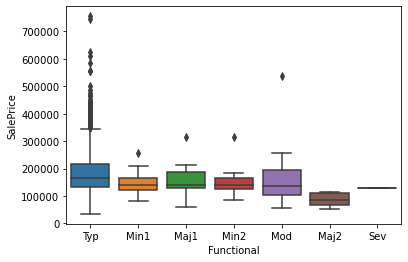

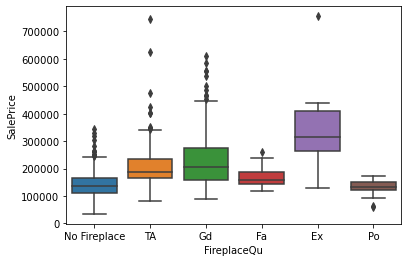

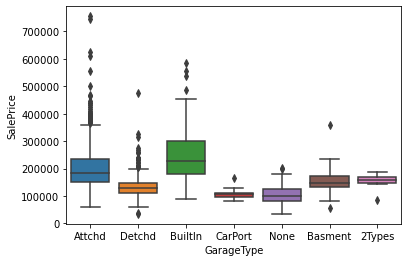

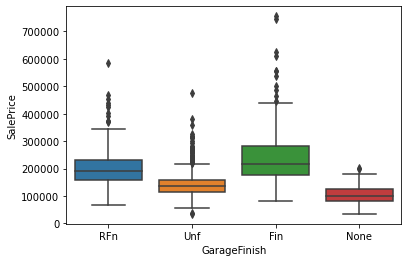

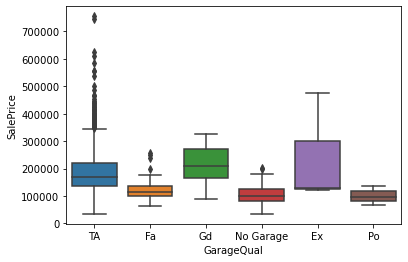

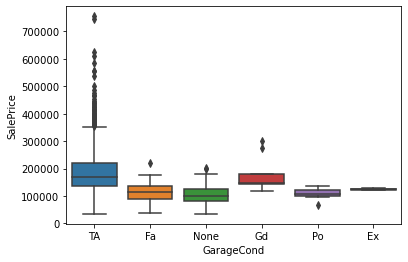

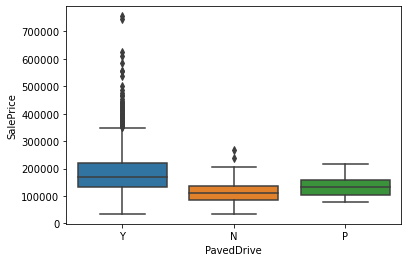

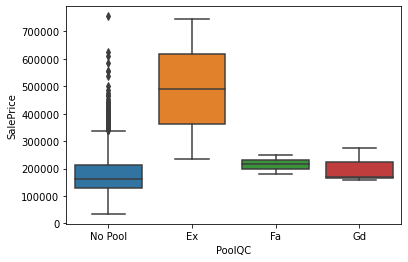

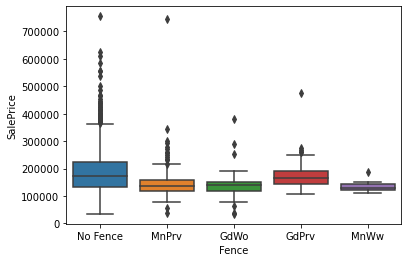

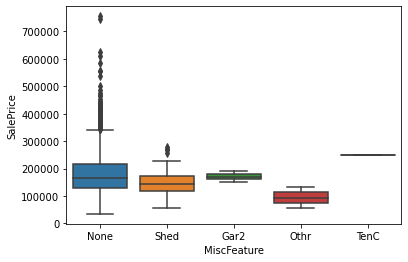

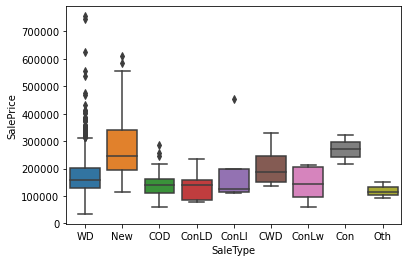

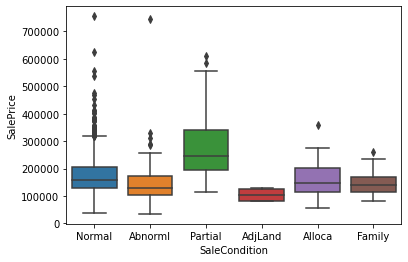

In [24]:
# Plotting categorical columns

for col in cat_cols:
    plt.subplots()
    sns.boxplot(x = col, y = "SalePrice", data = df_price)

As per above plots, Sale price is high in case of:

* MSZoning is Residential Low Density
* Non Alley access has more Sale price in alley
* irregular and regular Lotspace has more sale price 
* Hillside - Significant slope from side to side
* Cul-de-sac in Lot configuration
* Moderate Slope	
* Within 200' of North-South Railroad
* General condition is normal
* single family detached
* 2Story or 1Story house style has more sale price.
* Roof style is Gable & Hip.
* Masonry veneer type is Brick Face or Stone
* If Basement, Garage, External quality and condition is good or excellent.

In [25]:
def map_quality(x):
    return x.map({10 : "Very Excellent", 9 : "Excellent", 8 : "Good", 7 : "Good", 6 : "Average", 5 : "Average", 4 : "Poor", 3 : "Poor", 2 : "Very Poor", 1 : "Very Poor"})

df_price["OverallQual"] = df_price[["OverallQual"]].apply(map_quality)
df_price["OverallCond"] = df_price[["OverallCond"]].apply(map_quality)

In [26]:
# Deriving new columns

df_price['AgeYearBuilt'] = df_price['YrSold']-df_price['YearBuilt']
df_price['AgeYearRemodelled'] = df_price['YrSold']-df_price['YearRemodAdd']
df_price['AgeGarage'] = df_price['YrSold']-df_price['GarageYrBlt']

In [27]:

# Dropping the columns 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' after deriving new variables

df_price = df_price.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'], axis = 1)

In [28]:
df_price.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeYearBuilt,AgeYearRemodelled,AgeGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,36.547945,22.950000,29.226712
std,42.300571,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,30.250152,20.640653,24.034844
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,8.000000,4.000000,7.000000
50%,50.000000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,35.000000,14.000000,28.000000
75%,70.000000,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,54.000000,41.000000,46.000000
max,190.000000,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,136.000000,60.000000,107.000000


In [29]:
# variable 'AgeYearRemodelled' has minimum value of -1 which is invalid, dropping the row

df_price = df_price[~(df_price['AgeYearRemodelled']==-1)]

In [30]:
df_price.shape

(1459, 75)

<AxesSubplot:>

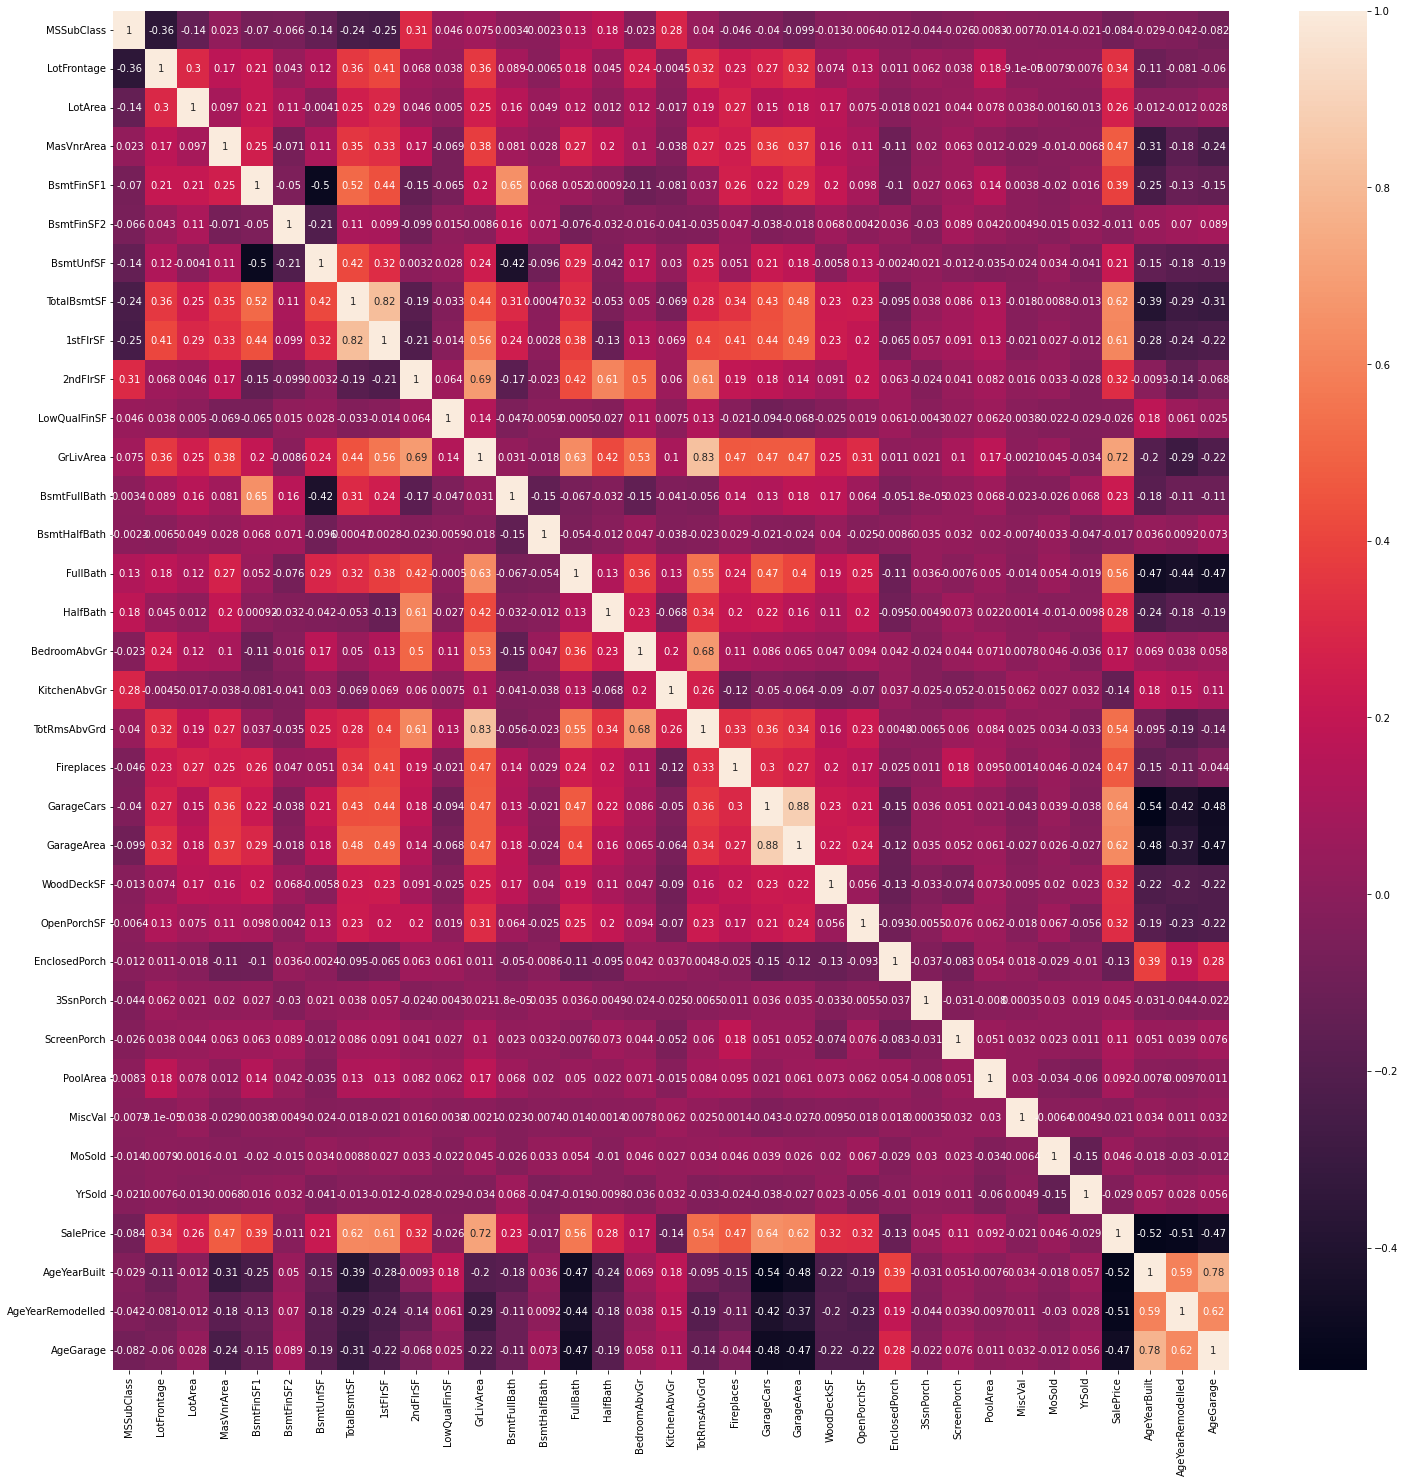

In [31]:
# Correlation details

plt.subplots(figsize=(25, 25))
sns.heatmap(df_price.corr(), annot=True)

From the above correlation matix:

* followin Elements have high corellation with Sale Price.
* * "GrLivArea", "GarageCars", "TotalBsmtSF".
* "GrLivArea" is highly correlated with "TotRmsAbvGrd"
* "GarageCars" is highly correlated with "GarageArea"
* "AgeYearBuilt" is highly correlated with "AgeGarage"
* "TotalBsmtSF" is highly correlated with "1stFlrSF"

In [32]:
# Dropping columns

cols = ["TotRmsAbvGrd", "GarageArea", "AgeGarage", "1stFlrSF"]
df_price = df_price.drop(cols, axis = 1)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

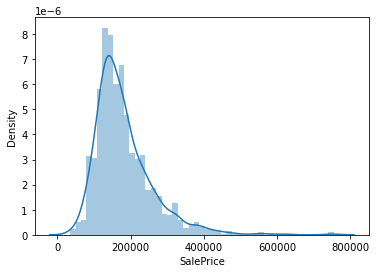

In [33]:
# check for target variable distribution
sns.distplot(df_price['SalePrice'], hist=True)

In [34]:
print("Skewness of target variable wihout transformation: %f" % df_price['SalePrice'].skew())
print("Kurtosis of target variable wihout transformation: %f" % df_price['SalePrice'].kurt())

Skewness of target variable wihout transformation: 1.882336
Kurtosis of target variable wihout transformation: 6.530044


Skewness of transformed target variable: 0.121831
Kurtosis of transformed target variable: 0.807339


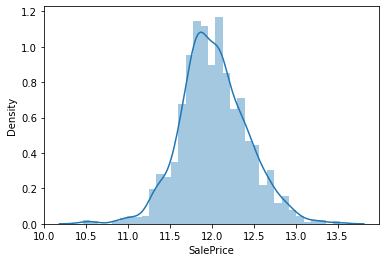

In [35]:
# Target variable needs transformation to remove skewness

# Performing log transformation 
df_price['SalePrice'] = np.log1p(df_price['SalePrice'])

# re-checkig the variable after transformation:
sns.distplot(df_price['SalePrice'], hist=True)

print("Skewness of transformed target variable: %f" % df_price['SalePrice'].skew())
print("Kurtosis of transformed target variable: %f" % df_price['SalePrice'].kurt())

In [36]:
cat_cols = df_price.select_dtypes(include = "object")
num_cols = df_price.select_dtypes(exclude = "object")

df_price.shape

(1459, 71)

In [37]:
# Creating dummy variables for categorical variables
dummies = pd.get_dummies(df_price[cat_cols.columns], drop_first = True)
df_price = pd.concat([df_price, dummies], axis = 1)

# Drop original categorical columns
df_price = df_price.drop(cat_cols.columns, axis = 1)

In [38]:
df_price.shape

(1459, 242)

## Model building

In [39]:
# Data split - train and test

np.random.seed(42)
housing_data_train, housing_data_test = train_test_split(df_price, train_size = 0.7, test_size = 0.3, random_state = 42)

In [40]:
# Scaling the numeric features

scaler = MinMaxScaler()
num_features = list(num_cols.columns)

In [41]:
housing_data_train[num_features] = scaler.fit_transform(housing_data_train[num_features])
housing_data_train.head()

housing_data_test[num_features] =scaler.transform(housing_data_test[num_features])
housing_data_test.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,AgeYearBuilt,AgeYearRemodelled,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Poor,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1322,0.235294,0.294521,0.041534,0.000000,0.119419,0.0,0.032534,0.122750,0.417433,0.0,0.285

In [42]:
# independent and dependent variables - train and test

y_train = housing_data_train.pop("SalePrice")
X_train = housing_data_train

y_test = housing_data_test.pop("SalePrice")
X_test = housing_data_test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1021, 241), (1021,), (438, 241), (438,))

In [43]:
# using RFE to select the top 30 features

lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=30, step = 1)
rfe_fit = rfe.fit(X_train, y_train)

In [44]:
# Ranking of the column by RFE for feature importance:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 210),
 ('LotFrontage', False, 110),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 188),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 9),
 ('BsmtUnfSF', False, 10),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 92),
 ('LowQualFinSF', False, 167),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 27),
 ('BsmtHalfBath', False, 125),
 ('FullBath', False, 50),
 ('HalfBath', False, 107),
 ('BedroomAbvGr', False, 152),
 ('KitchenAbvGr', False, 173),
 ('Fireplaces', False, 211),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 59),
 ('OpenPorchSF', False, 119),
 ('EnclosedPorch', False, 121),
 ('3SsnPorch', False, 39),
 ('ScreenPorch', False, 30),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 161),
 ('YrSold', False, 184),
 ('AgeYearBuilt', True, 1),
 ('AgeYearRemodelled', False, 4),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Alley_No Alley Access', False, 148),
 ('Alley_Pave', 

In [45]:
# Picking the features with rank 1

rfe_ranking = pd.DataFrame({'rank' : rfe_fit.ranking_, 'support' : rfe_fit.support_, 'features' : X_train.columns}).sort_values(by = 'rank', ascending = True)

selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1, 'features'].values
selected_features

array(['MSZoning_RL', 'MiscVal', 'SaleType_ConLI', 'AgeYearBuilt',
       'MSZoning_FV', 'MSZoning_RH', 'Neighborhood_MeadowV',
       'MSZoning_RM', 'ExterCond_TA', 'ExterCond_Po', 'ExterCond_Gd',
       'ExterCond_Fa', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_TA',
       'Exterior1st_BrkComm', 'PoolArea', 'GarageType_CarPort',
       'GarageType_Detchd', 'Neighborhood_Crawfor', 'LotArea',
       'PoolQC_No Pool', 'GarageType_BuiltIn', 'BsmtFinSF1',
       'TotalBsmtSF', 'GarageCars', 'GarageType_Basment', 'PoolQC_Gd',
       'GrLivArea', 'GarageType_Attchd'], dtype=object)

In [46]:
# Updated training and testing data

X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [47]:
# Building linear regression model

lm1 = LinearRegression()
lm1.fit(X_train, y_train)

LinearRegression()

In [48]:
print(lm1.coef_)
print(lm1.intercept_)

[ 0.13536393 -0.09040548 -0.15563889 -0.14075731  0.16288289  0.10385285
 -0.07266724  0.1237357  -0.1226478  -0.20602764 -0.10990451 -0.15385496
 -0.11390394 -0.09807651 -0.11031319 -0.1575095   2.60683171  0.10845851
  0.11373716  0.0744808   0.1193111   1.90914728  0.14822898  0.15609902
  0.33636214  0.13589858  0.11433085 -0.47724552  0.55995873  0.13209418]
-1.6415855697256254


In [49]:
y_pred_train = lm1.predict(X_train)
y_pred_test = lm1.predict(X_test)

In [50]:
# Metrics evaluation

lm1_r2_train = r2_score(y_train, y_pred_train)
lm1_r2_test = r2_score(y_test, y_pred_test)

lm1_mse_train = mean_squared_error(y_train, y_pred_train)
lm1_mse_test = mean_squared_error(y_test, y_pred_test)

lm1_rmse_train = lm1_mse_train ** 0.5
lm1_rmse_test = lm1_mse_test ** 0.5

print("Train R2 score: ", lm1_r2_train)
print("Test R2 score: ", lm1_r2_test)
print()
print("Train MSE: ", lm1_mse_train)
print("Test MSE: ", lm1_mse_test)
print()
print("Train RMSE: ", lm1_rmse_train)
print("Test RMSE: ", lm1_rmse_test)

Train R2 score:  0.8547625720492584
Test R2 score:  0.7925447872276535

Train MSE:  0.00247202690463756
Test MSE:  0.0034347574701515064

Train RMSE:  0.04971948214369856
Test RMSE:  0.0586068039578299


In [51]:
# Storing all results 

lm_metric = [round(lm1_r2_train,3), round(lm1_r2_test,3), 
             round(lm1_mse_train,3), round(lm1_mse_test,3), 
             round(lm1_rmse_train,3), round(lm1_rmse_test,3)]

lm_metric

[0.855, 0.793, 0.002, 0.003, 0.05, 0.059]

In [52]:
# Params for tuning the regularized model

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [53]:
# Trying Ridge method

ridge = Ridge()
folds = 5

model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

model_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:

# Check the best alpha value

model_ridge.best_params_

{'alpha': 0.001}

In [55]:
# Using the best alpha value

alpha = 0.2
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=0.2)

In [56]:
# model co-efficients

ridge.coef_

array([ 0.11880258, -0.08332607, -0.1137584 , -0.1424211 ,  0.14283055,
        0.08341369, -0.07341159,  0.10517339, -0.08514188, -0.14169794,
       -0.06770474, -0.11540676, -0.09773737, -0.0484578 , -0.09638198,
       -0.14942799,  0.36729402,  0.08253686,  0.09312473,  0.07525085,
        0.11281959,  0.28319883,  0.12917724,  0.11668952,  0.27242166,
        0.15628963,  0.09109488, -0.24941907,  0.53252047,  0.11600067])

In [57]:
# Predicted results

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [58]:
# Metrics evaluation

ridge_r2_train = r2_score(y_train, y_pred_train)
ridge_r2_test = r2_score(y_test, y_pred_test)

ridge_mse_train = mean_squared_error(y_train, y_pred_train)
ridge_mse_test = mean_squared_error(y_test, y_pred_test)

ridge_rmse_train = ridge_mse_train ** 0.5
ridge_rmse_test = ridge_mse_test ** 0.5

print("Train R2 score: ", ridge_r2_train)
print("Test R2 score: ", ridge_r2_test)
print()
print("Train MSE: ", ridge_mse_train)
print("Test MSE: ", ridge_mse_test)
print()
print("Train RMSE: ", ridge_rmse_train)
print("Test RMSE: ", ridge_rmse_test)

Train R2 score:  0.8383721131401312
Test R2 score:  0.8152767694815412

Train MSE:  0.0027510022071777643
Test MSE:  0.003058392640295085

Train RMSE:  0.05244999720855821
Test RMSE:  0.05530273628216858


In [59]:
# Storing all results 

ridge_metric = [round(ridge_r2_train,3), round(ridge_r2_test,3), 
                round(ridge_mse_train,3), round(ridge_mse_test,3), 
                round(ridge_rmse_train,3), round(ridge_rmse_test,3)]

ridge_metric

[0.838, 0.815, 0.003, 0.003, 0.052, 0.055]

In [60]:
# using GridSearchCV with 5 folds to find the best alpha for Lasso Model
lasso = Lasso()
folds = 5

model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  
model_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# Checking the best alpha value

model_lasso.best_params_

{'alpha': 0.0001}

In [62]:
# using the best alpha for Lasso model

alpha = 0.0001
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [63]:
# Co-efficients given by model

lasso.coef_

array([ 0.0601901 , -0.02814383, -0.02786882, -0.14574173,  0.08038021,
        0.01109644, -0.06540582,  0.04512825, -0.01759286, -0.00480721,
        0.        , -0.04510751, -0.03293782,  0.01325104, -0.03408944,
       -0.11682234,  0.        ,  0.        ,  0.03319715,  0.07113497,
        0.08003186,  0.0256836 ,  0.06462002,  0.09629994,  0.25033389,
        0.15259217,  0.01934449, -0.1826144 ,  0.54842022,  0.05667269])

In [64]:
# Predicted results

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [65]:
# Metic Evaluation

lasso_r2_train = r2_score(y_train, y_pred_train)
lasso_r2_test = r2_score(y_test, y_pred_test)

lasso_mse_train = mean_squared_error(y_train, y_pred_train)
lasso_mse_test = mean_squared_error(y_test, y_pred_test)

lasso_rmse_train = lasso_mse_train ** 0.5
lasso_rmse_test = lasso_mse_test ** 0.5

print("Train R2 score: ", lasso_r2_train)
print("Test R2 score: ", lasso_r2_test)
print()
print("Train MSE: ", lasso_mse_train)
print("Test MSE: ", lasso_mse_test)
print()
print("Train RMSE: ", lasso_rmse_train)
print("Test RMSE: ", lasso_rmse_test)

Train R2 score:  0.8243624734971988
Test R2 score:  0.8262284361668115

Train MSE:  0.002989454557995706
Test MSE:  0.002877070038393919

Train RMSE:  0.05467590472955803
Test RMSE:  0.053638326207982284


In [66]:
# Storing results

lasso_metric = [round(lasso_r2_train,3), round(lasso_r2_test,3), 
                round(lasso_mse_train,3), round(lasso_mse_test,3), 
                round(lasso_rmse_train,3), round(lasso_rmse_test,3)]

lasso_metric

[0.824, 0.826, 0.003, 0.003, 0.055, 0.054]

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

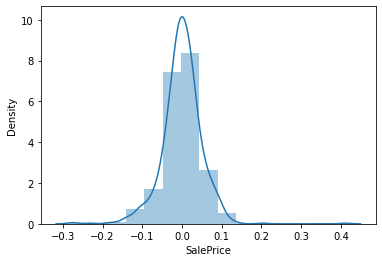

In [67]:
# Residual Analysis

y_pred_train = lm1.predict(X_train)
sns.distplot(y_train - y_pred_train, bins = 15)

<AxesSubplot:ylabel='SalePrice'>

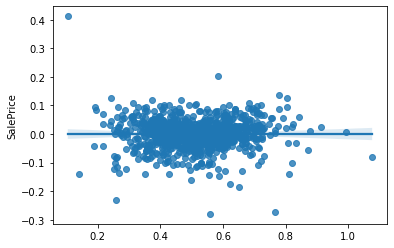

In [68]:
sns.regplot(y_pred_train, y_train - y_pred_train)

From the above two plots, we can say, our model does not violates any assumptions of linear regression.
* Residuals follow normal distribution around mean 0.
* There is no visible pattern in the residuals plot.

## Results Interpretation

In [69]:
# Comparing metrics

metrics = pd.DataFrame({"Metric" : ["Train R2", "Test R2", "Train MSE", "Test MSE", "Train RMSE", "Test RMSE"],
                      "Linear Regression" : lm_metric,
                      "Ridge" : ridge_metric,
                      "Lasso" : lasso_metric})

metrics

,Metric,Linear Regression,Ridge,Lasso
0,Train R2,0.855,0.838,0.824
1,Test R2,0.793,0.815,0.826
2,Train MSE,0.002,0.003,0.003
3,Test MSE,0.003,0.003,0.003
4,Train RMSE,0.050,0.052,0.055
5,Test RMSE,0.059,0.055,0.054


## From the above table:
- Linear regression model : Overfitting
- Ridge and Lasso are performing better

In [70]:
# Comparing co-efficients

coefficients = pd.DataFrame({"Feature" : X_train.columns,
                     "Linear Regression" : lm1.coef_,
                     "Ridge" : ridge.coef_,
                     "Lasso" : lasso.coef_})

coefficients

,Feature,Linear Regression,Ridge,Lasso
0,MSZoning_RL,0.135364,0.118803,0.060190
1,MiscVal,-0.090405,-0.083326,-0.028144
2,SaleType_ConLI,-0.155639,-0.113758,-0.027869
3,AgeYearBuilt,-0.140757,-0.142421,-0.145742
4,MSZoning_FV,0.162883,0.142831,0.080380
5,MSZoning_RH,0.103853,0.083414,0.011096
6,Neighborhood_MeadowV,-0.072667,-0.073412,-0.065406
7,MSZoning_RM,0.123736,0.105173,0.045128
8,ExterCond_TA,-0.122648,-0.085142,-0.017593
9,ExterCond_Po,-0.206028,-0.141698,-0.004807


Even though Ridge and Lasso are performing better, preferring Lasso model as few of the co-efficients pushed to zero

In [71]:
# Final Lasso model
alpha = 0.0001
lasso = Lasso(alpha = alpha)

#fitting model
lasso.fit(X_train, y_train)

#predicting house prices
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

#looking at r2 score(metric)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train R2 Score:", r2_train)
print("Test R2 Score:", r2_test)

Train R2 Score: 0.8243624734971988
Test R2 Score: 0.8262284361668115


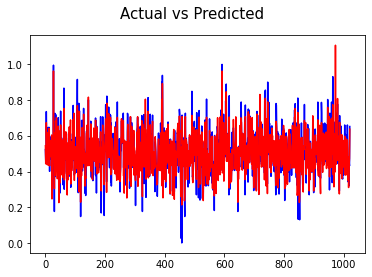

In [72]:
# Actual vs Predicted
c = [i for i in range(0, len(X_train), 1)]
plt.plot(c, y_train, color="blue")
plt.plot(c, y_pred_train, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.show()

Text(0, 0.5, 'y_test_pred')

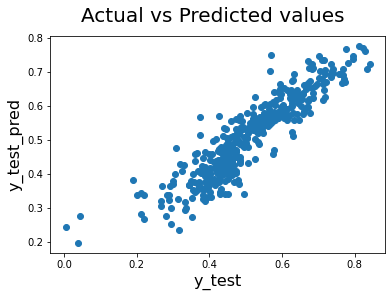

In [73]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('Actual vs Predicted values', fontsize = 20)              
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_test_pred', fontsize = 16)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

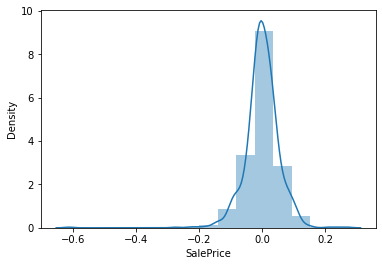

In [74]:
# Residual Analysis

y_pred_train = lasso.predict(X_train)
sns.distplot(y_train - y_pred_train, bins = 15)

<AxesSubplot:ylabel='SalePrice'>

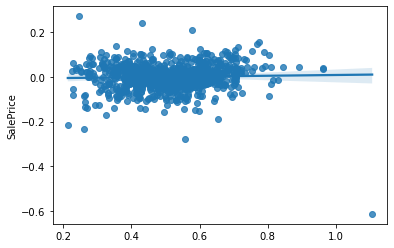

In [75]:
sns.regplot(y_pred_train, y_train - y_pred_train)

From the above plots, we can say, our model does not violates any assumptions of linear regression.

- Residuals follow normal distribution around mean 0.
- There is no visible pattern in the residuals plot.

Also actual and predicted values are very near.

In [76]:
coefficients[["Feature", "Lasso"]]

,Feature,Lasso
0,MSZoning_RL,0.060190
1,MiscVal,-0.028144
2,SaleType_ConLI,-0.027869
3,AgeYearBuilt,-0.145742
4,MSZoning_FV,0.080380
5,MSZoning_RH,0.011096
6,Neighborhood_MeadowV,-0.065406
7,MSZoning_RM,0.045128
8,ExterCond_TA,-0.017593
9,ExterCond_Po,-0.004807


#### Conclusion:
Overfitting is observed in Linear Regresion Model

Ridge Model:

* Optimal value of lambda for Ridge regression is 0.2
* Train and Test R2 values are 0.8383 and 0.8152

Lasso Model:

* Optimal value of lambda for Lasso regression is 0.0001
* Train and Test R2 values are 0.82436 and 0.826


Top 10 variables that are significant in predicting the price of a house obtained from Lasso regression are:

* GrLivArea
* Exterior1st_BrkComm 
* TotalBsmtSF 
* ExterQual_Fa 
* KitchenAbvGr 
* Functional_Maj2 
* GarageCars 
* LotArea 
* Functional_Sev 
* ExterQual_TA 